In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from locationHelper import LocationHelper
np.random.seed(42)
from datetime import datetime

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
RATE_BEER_URL = "./data/RateBeer/"
BEER_DATA_URL = "./data/BeerAdvocate/"

In [4]:
beer_adv_ratings = pd.read_csv("./data/BeerAdvocate/beerAdvocateRatings.csv")

In [5]:
beer_adv_ratings.head(15)

,rating,country_name,country_code3,state,date_object,month,year
0,2.88,United States,USA,Washington,2015-08-20 12:00:00,8,2015
1,3.67,United States,USA,New York,2009-02-20 12:00:00,2,2009
2,3.73,United Kingdom,GBR,NaN,2006-03-13 12:00:00,3,2006
3,3.98,United Kingdom,GBR,NaN,2004-12-01 12:00:00,12,2004
4,4.00,United Kingdom,GBR,NaN,2004-08-30 12:00:00,8,2004
5,3.25,United States,USA,Kansas,2014-12-01 12:00:00,12,2014
6,3.50,United States,USA,New Jersey,2014-05-29 12:00:00,5,2014
7,3.50,United States,USA,North Carolina,2014-02-26 12:00:00,2,2014
8,3.75,United States,USA,Oklahoma,2014-02-10 12:00:00,2,2014
9,3.25,United States,USA,Kansas,2014-01-25 12:00:00,1,2014


In [6]:
df_test = pd.read_parquet('./data/BeerAdvocate/ratings_brotli.parquet')

In [7]:
df_test.head()

,Style,ABV,Dates,Year,Month,Day,Weekday,User_ID,Rating,Review,Appearance,Aroma,Palate,Taste,Overall,Text_NB_Words,User_Location
0,Euro Pale Lager,4.5,1440064800,2015,8,20,3,nmann08.184925,2.88,True,3.25,2.75,3.25,2.75,3.0,59,"United States, Washington"
1,English Pale Ale,4.5,1235127600,2009,2,20,4,stjamesgate.163714,3.67,True,3.00,3.50,3.50,4.00,3.5,47,"United States, New York"
2,English Pale Ale,4.5,1142247600,2006,3,13,0,mdagnew.19527,3.73,True,4.00,3.50,3.50,4.00,3.5,73,Northern Ireland
3,English Pale Ale,4.5,1101898800,2004,12,1,2,helloloser12345.10867,3.98,True,4.00,3.50,4.00,4.00,4.5,82,Northern Ireland
4,English Pale Ale,4.5,1093860000,2004,8,30,0,cypressbob.3708,4.00,True,4.00,4.00,4.00,4.00,4.0,42,Northern Ireland


In [8]:
column_names = df_test.columns.tolist()
print(column_names)
print(len(column_names))

['Style', 'ABV', 'Dates', 'Year', 'Month', 'Day', 'Weekday', 'User_ID', 'Rating', 'Review', 'Appearance', 'Aroma', 'Palate', 'Taste', 'Overall', 'Text_NB_Words', 'User_Location']
17


# Degree of seasonality depending on latitude

Degeree of seasonality isnt defined by litterature, so we would have to define it to answer this question  
--> seasonality shouldnt depend only on latitude, because earth axial tilt  
--> should also depend on **day length and temperature** (but these infos we can obtain with weather infos)

assumption that one country or state latitude 

--> found two datasets with latitudes, put them into CSV file  
https://developers.google.com/public-data/docs/canonical/states_csv  
https://developers.google.com/public-data/docs/canonical/countries_csv  
https://www.kaggle.com/datasets/paultimothymooney/latitude-and-longitude-for-every-country-and-state?resource=download



# Beer types seasonality

In [9]:
unique_countries = beer_adv_ratings['country_name'].unique()

print(unique_countries)

['United States' 'United Kingdom' nan 'Ireland' 'Serbia' 'Spain'
 'Viet Nam' 'Romania' 'Russian Federation' 'Canada' 'Australia' 'Finland'
 'Sweden' 'Switzerland' 'Austria' 'Cyprus' 'Brazil' 'Slovenia' 'Germany'
 'France' 'South Africa' 'Denmark' 'Japan' 'Belarus' 'Jersey' 'Hong Kong'
 'Italy' 'China' 'Thailand' 'Chile' 'Norway' 'Portugal' 'Poland'
 'Netherlands' 'Czechia' 'Belgium' 'Greece' 'Singapore'
 'United Arab Emirates' 'Ukraine' 'Venezuela, Bolivarian Republic of'
 'Philippines' 'Ethiopia' 'Estonia' 'Malaysia' 'Taiwan, Province of China'
 'Tajikistan' 'Mexico' 'Luxembourg' 'Bahamas' 'Panama' 'Croatia'
 'Lithuania' 'Bolivia, Plurinational State of' 'Antarctica' 'Hungary'
 'Bulgaria' 'Puerto Rico' 'Türkiye' 'Malta' 'Trinidad and Tobago'
 'Guernsey' 'Lesotho' 'Latvia' 'Jordan' 'Israel' 'Argentina' 'Lebanon'
 'India' 'Iceland' 'Egypt' 'American Samoa' 'Papua New Guinea'
 'Faroe Islands' 'Mozambique' 'Costa Rica' 'Barbados' 'Bermuda' 'Colombia'
 'Tokelau' 'Guam' 'Isle of Man' 'Angui

### Latitudes :
- Negative value : southern hemisphere
- Positive value : nothern hemisphere

### Seasons :
**Northern Hemisphere:**
- Spring: March 20 – June 21
- Summer: June 21 – September 23
- Fall (Autumn): September 23 – December 21
- Winter: December 21 – March 20

Simplified by month:
- Winter : 12-2
- Spring : 3-5
- Summer : 6-8
- Fall : 9-11

**Southern Hemisphere:**
- Spring: September 23 – December 21
- Summer: December 21 – March 20
- Fall (Autumn): March 20 – June 21
- Winter: June 21 – September 23

Simplified by month:
- Summer : 12-2
- Fall : 3-5
- Winter : 6-8
- Spring : 9-11

For a more focused approach on **seasonality linked to beer type**, here’s how you can break it down into a logical series of steps for analysis:

### 1. **Overall Seasonality for Each Beer Type**
   - **Objective**: Identify if specific beer types are rated differently across seasons.
   - **Actions**:
     - **Group the data** by beer type and season (e.g., winter: 1-3, spring: 4-6, summer: 7-9, autumn: 10-12).
     - For each beer type, calculate the **average rating** for each season (Winter, Spring, Summer, Autumn).
     - **Visualize** the seasonal trends for each beer type (e.g., line plots showing ratings for each season).
     - **Statistical Test**: 
       - Use **ANOVA** (if ratings are normally distributed) or **Kruskal-Wallis test** (if ratings are not normally distributed) to check if there are significant differences in the average ratings across seasons for each beer type.
       - If the ANOVA test is significant, you could also use **pairwise comparisons** (e.g., Tukey’s HSD test) to identify which seasons differ from each other for each beer type.

### 2. **Seasonal Rating Trends Over Time for Beer Types**
   - **Objective**: Explore how ratings for each beer type change across months or years to identify seasonal fluctuations.
   - **Actions**:
     - **Group the data** by beer type and month or year.
     - Plot **time series** of ratings for each beer type to visualize any patterns over the months or years.
     - Calculate the **mean rating** for each beer type during each month or year to identify seasonal peaks and troughs.
     - **Statistical Test**:
       - Use **Mann-Kendall test** or **Spearman’s rank correlation** to check for trends over time (whether ratings are increasing, decreasing, or showing seasonal fluctuation).
       - You can also apply **regression analysis** (linear or polynomial) to model the seasonal fluctuations in ratings for each beer type.

### 3. **Compare Rating Distribution Across Seasons by Beer Type**
   - **Objective**: Determine if certain beer types are more popular in particular seasons, and how the distribution of ratings differs across those seasons.
   - **Actions**:
     - For each beer type, calculate the **distribution** of ratings (e.g., mean, standard deviation, skewness) for each season.
     - **Visualize** the distribution of ratings (e.g., boxplots or violin plots) for each beer type across the different seasons.
     - **Statistical Test**:
       - Use the **Kolmogorov-Smirnov test** to compare the distribution of ratings for each beer type across seasons.
       - Alternatively, **Chi-squared tests** or **Cramér's V** could be used to compare the frequency of high and low ratings for each beer type across seasons.

### 4. **Assess Impact of Season on Popularity of Beer Types**
   - **Objective**: Identify whether certain beer types are consumed more in specific seasons (e.g., dark beers in winter, light beers in summer).
   - **Actions**:
     - Group the data by beer type and count the number of reviews in each season.
     - **Statistical Test**: 
       - Use a **Chi-squared test** to compare the frequency of reviews for each beer type across seasons.
       - Conduct a **Cramér's V test** to assess the strength of the relationship between beer types and seasons.
       - For each beer type, check if the number of reviews varies significantly by season.

### 5. **Check for Interaction Between Beer Type and Climate or Geography**
   - **Objective**: Examine if the relationship between beer type and seasonality differs based on geographic location or climate.
   - **Actions**:
     - If you have data on geographic location, **categorize the regions** into climate types (e.g., tropical, temperate, arctic).
     - For each region, check how beer type preferences (based on ratings) change with the seasons.
     - **Statistical Test**:
       - Perform a **two-way ANOVA** to see if there is an interaction between beer type and season for different geographic regions/climates. This will help assess if climate influences the seasonality of specific beer types.

### 6. **Hypothesis Testing for Specific Beer Types and Seasons**
   - **Objective**: Test specific hypotheses regarding beer preferences and seasonality (e.g., darker beers are rated higher in winter).
   - **Actions**:
     - Develop hypotheses about the seasonality of specific beer types (e.g., "Darker beers are rated higher in winter" or "Lighter beers are rated higher in summer").
     - For each hypothesis, conduct the appropriate statistical test to evaluate the seasonal variation for that beer type.
     - **Statistical Test**:
       - Use **t-tests** (if you are comparing two seasons) or **ANOVA** (if comparing more than two seasons) to test whether ratings for specific beer types are significantly higher in certain seasons.
       - If the ratings are skewed or not normally distributed, use **Mann-Whitney U tests** or **Kruskal-Wallis tests** as appropriate.

---

### Summary of Key Steps:

1. **Check overall seasonality** for each beer type by calculating average ratings for each season and running ANOVA or Kruskal-Wallis tests.
2. **Analyze rating trends over time** for each beer type using time series plots and Mann-Kendall tests or regression models.
3. **Compare distribution of ratings** for each beer type across seasons with tests like the Kolmogorov-Smirnov test or Chi-squared tests.
4. **Examine beer popularity across seasons** using Chi-squared tests to see if some beer types are more popular in specific seasons.
5. **Account for geographic and climate factors**, running two-way ANOVA to see how beer preferences differ by region and season.
6. **Test specific hypotheses** about beer type and seasonality (e.g., darker beers are more liked in winter) using t-tests or ANOVA.

By following these steps, you’ll be able to rigorously test the seasonality of beer types and uncover patterns related to beer ratings, preferences, and trends across different seasons.

### Seasonality for beer types : which beer type is the most liked per month?

In [10]:
df_test.head()

,Style,ABV,Dates,Year,Month,Day,Weekday,User_ID,Rating,Review,Appearance,Aroma,Palate,Taste,Overall,Text_NB_Words,User_Location
0,Euro Pale Lager,4.5,1440064800,2015,8,20,3,nmann08.184925,2.88,True,3.25,2.75,3.25,2.75,3.0,59,"United States, Washington"
1,English Pale Ale,4.5,1235127600,2009,2,20,4,stjamesgate.163714,3.67,True,3.00,3.50,3.50,4.00,3.5,47,"United States, New York"
2,English Pale Ale,4.5,1142247600,2006,3,13,0,mdagnew.19527,3.73,True,4.00,3.50,3.50,4.00,3.5,73,Northern Ireland
3,English Pale Ale,4.5,1101898800,2004,12,1,2,helloloser12345.10867,3.98,True,4.00,3.50,4.00,4.00,4.5,82,Northern Ireland
4,English Pale Ale,4.5,1093860000,2004,8,30,0,cypressbob.3708,4.00,True,4.00,4.00,4.00,4.00,4.0,42,Northern Ireland


In [ ]:
unique_beer_types = df_test['Style'].unique()

print(unique_beer_types)

['Euro Pale Lager' 'English Pale Ale' 'English Bitter'
 'American Pale Wheat Ale' 'American Blonde Ale' 'Irish Red Ale'
 'American Stout' 'American Pale Ale (APA)' 'Milk / Sweet Stout'
 'American Double / Imperial IPA' 'German Pilsener' 'American IPA'
 'Irish Dry Stout' 'Munich Helles Lager' 'English Brown Ale'
 'English India Pale Ale (IPA)' 'English Porter' 'Saison / Farmhouse Ale'
 'Foreign / Export Stout' 'Fruit / Vegetable Beer'
 'American Double / Imperial Stout' 'American Porter'
 'English Dark Mild Ale' 'Berliner Weissbier' 'Hefeweizen' 'English Stout'
 'California Common / Steam Beer' 'American Black Ale'
 'American Amber / Red Ale' 'Tripel' 'Kölsch' 'Altbier' 'Smoked Beer'
 'Bière de Garde' 'Oatmeal Stout' 'Extra Special / Strong Bitter (ESB)'
 'Rye Beer' 'Russian Imperial Stout' 'American Wild Ale' 'Winter Warmer'
 'English Pale Mild Ale' 'Belgian Pale Ale' 'Belgian IPA' 'Czech Pilsener'
 'Belgian Strong Pale Ale' 'Old Ale' 'Dunkelweizen' 'English Strong Ale'
 'Schwarzbier' 

In [15]:
len(unique_beer_types)

104

In [29]:
grouped_style_popularity = df_test.groupby(['Month', 'Style']).agg(
        rating_mean = ('Rating', 'mean'),
    rating_variance = ('Rating', 'var'),
    rating_std = ('Rating', 'std'),
    rating_count = ('Rating', 'count')
).reset_index()

In [30]:
grouped_style_popularity.head()

,Month,Style,rating_mean,rating_variance,rating_std,rating_count
0,1,Altbier,3.665217,0.272529,0.522043,2141
1,1,American Adjunct Lager,2.562706,0.592843,0.769963,9415
2,1,American Amber / Red Ale,3.730093,0.301019,0.548653,16834
3,1,American Amber / Red Lager,3.336684,0.382694,0.618622,3561
4,1,American Barleywine,4.020213,0.239310,0.489194,10187


/var/folders/ym/l2ghjvys50qctty39wm955gm0000gn/T/ipykernel_21723/430025570.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'rating_count'))  # Get the top 10 for each month


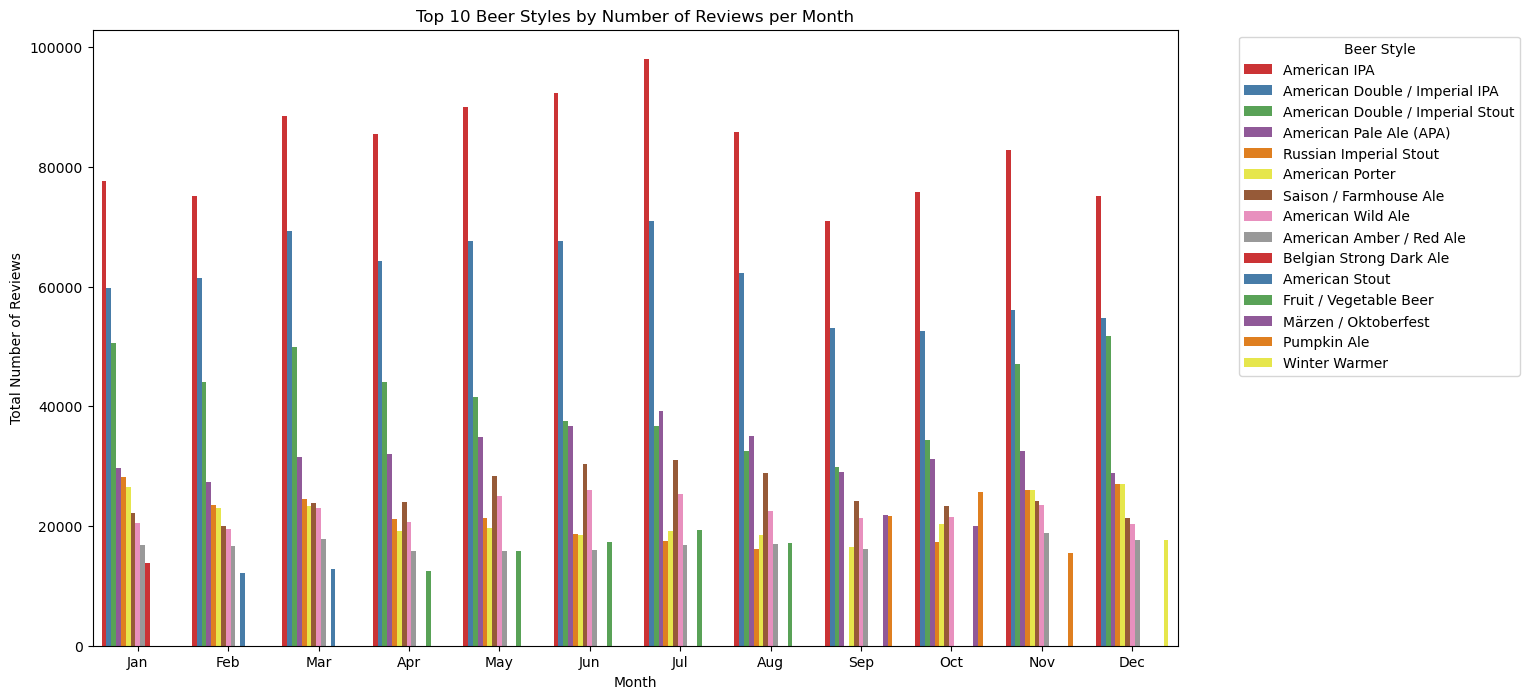

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group the data by Month and Style to calculate the total number of reviews for each style
grouped_style_popularity = df_test.groupby(['Month', 'Style']).agg(
    rating_count = ('Rating', 'count')
).reset_index()

# Step 2: For each month, find the top 10 beer styles by total reviews
top_styles_per_month = (
    grouped_style_popularity.groupby('Month')
    .apply(lambda x: x.nlargest(10, 'rating_count'))  # Get the top 10 for each month
    .reset_index(drop=True)
)

# Step 3: Plot the total reviews for the top 10 beer styles per month
plt.figure(figsize=(14, 8))

# Use a color palette from Seaborn
palette = sns.color_palette("Set1", n_colors=15)

# Create the barplot with the top 10 styles per month
sns.barplot(data=top_styles_per_month, x='Month', y='rating_count', hue='Style', palette=palette)

# Customizing the plot
plt.title('Top 10 Beer Styles by Number of Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Total Number of Reviews')
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/ym/l2ghjvys50qctty39wm955gm0000gn/T/ipykernel_21723/2932378175.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'Review_Count'))


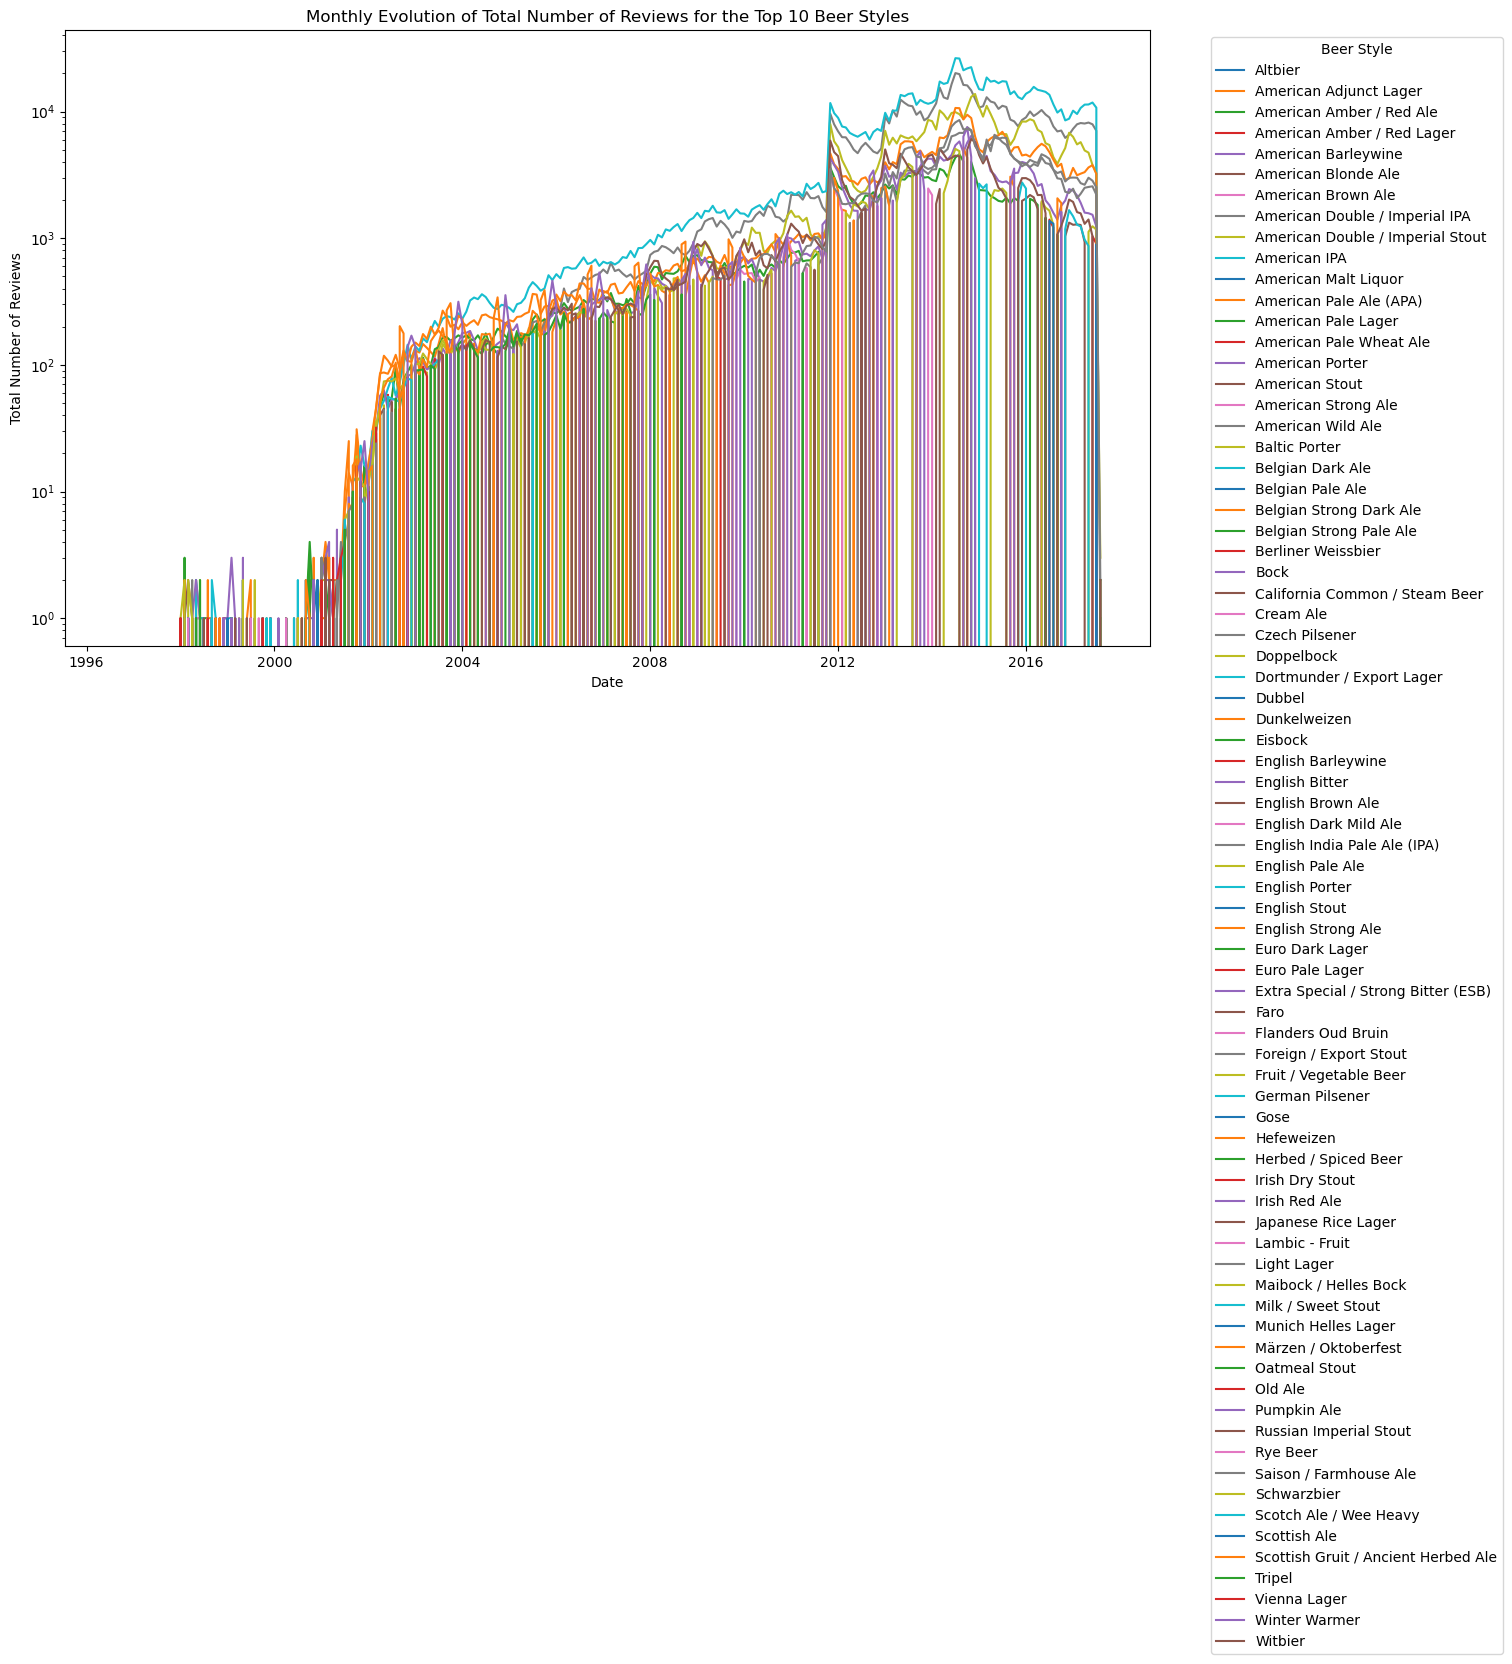

In [ ]:
# Step 1: Group by Year, Month, and Style to count the reviews
temp_df = df_test.groupby(['Year', 'Month', 'Style']).size().reset_index(name='Review_Count')

# Step 2: Create a Date column for consistent time series plotting without modifying df_test
temp_df['Date'] = pd.to_datetime(temp_df[['Year', 'Month']].assign(Day=1))

# Step 3: Identify the top 10 beer styles for each month
top_styles_per_month = (
    temp_df.groupby('Date')
    .apply(lambda x: x.nlargest(10, 'Review_Count'))
    .reset_index(drop=True)
)

# Step 4: Pivot the table to have each style as a column, with only the top 10 styles per month
pivot_df = top_styles_per_month.pivot_table(index='Date', columns='Style', values='Review_Count', fill_value=0)

plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Total Number of Reviews')
plt.title('Monthly Evolution of Total Number of Reviews for the Top 10 Beer Styles')
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Seasonality score

Difference of rating between median summer rating (6-8, june, july, august) and median winter rating (12-2; december, january, february) per style of beer

In [93]:
def calculate_seasonality_score(df, min_reviews = 100):
    temp_df = df.copy()
    summer_months = [6,7,8]
    winter_months = [12,1,2]

    # Create temporary dataset containing only summer and winter months
    temp_df['Season'] = temp_df['Month'].apply(lambda x: 'Summer' if x in summer_months else ('Winter' if x in winter_months else None))
    season_df = temp_df.dropna(subset=['Season'])

    # Remove the style with less than min_reviews for each years 
    yearly_review_counts = season_df.groupby(['Year', 'Style']).size().reset_index(name='Total_Review_Count')
    filtered_styles = yearly_review_counts[yearly_review_counts['Total_Review_Count'] >= min_reviews]

    season_df = season_df.merge(filtered_styles[['Year', 'Style']], on=['Year', 'Style'], how='inner')

    seasonal_stats = season_df.groupby(['Year', 'Style', 'Season']).agg(
        avg_rating=('Rating', 'mean'),
    ).unstack(fill_value=0)

    seasonal_stats['Seasonality_Score'] = seasonal_stats['avg_rating']['Summer'] - seasonal_stats['avg_rating']['Winter']

    return seasonal_stats[['Seasonality_Score']].reset_index()

    

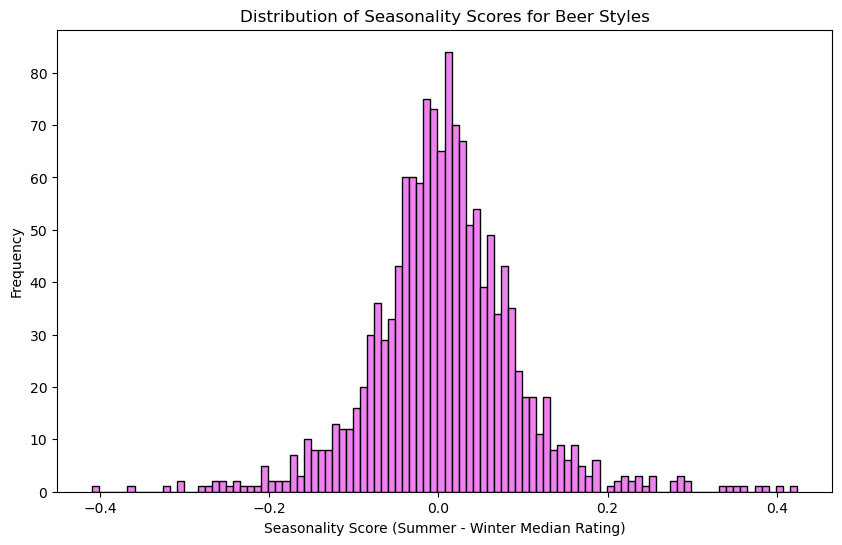

In [103]:
# Calculate seasonality scores
seasonality_scores = calculate_seasonality_score(df_test, min_reviews=100)

# Plot the histogram of seasonality scores
plt.figure(figsize=(10, 6))
#plt.yscale('log')
plt.hist(seasonality_scores['Seasonality_Score'], bins=100, color='violet', edgecolor='black')
plt.xlabel('Seasonality Score (Summer - Winter Median Rating)')
plt.ylabel('Frequency')
plt.title('Distribution of Seasonality Scores for Beer Styles')
plt.show()

In [95]:
seasonality_scores.head()

,Year,Style,Seasonality_Score
Season,,,
0,2002,American Adjunct Lager,0.080452
1,2002,American Amber / Red Ale,0.001691
2,2002,American Amber / Red Lager,0.125489
3,2002,American Blonde Ale,0.204414
4,2002,American IPA,0.039453


In [96]:
len(seasonality_scores['Seasonality_Score'])

1398

In [97]:
from scipy.stats import skew

In [98]:
mean_score = seasonality_scores['Seasonality_Score'].mean()
median_score = seasonality_scores['Seasonality_Score'].median()
skewness_score = skew(seasonality_scores['Seasonality_Score'].dropna())

print("Mean Seasonality Score:", mean_score)
print("Median Seasonality Score:", median_score)
print("Skewness of Seasonality Score:", skewness_score)

Mean Seasonality Score: 0.006637713
Median Seasonality Score: 0.006190776824951172
Skewness of Seasonality Score: 0.21837197883286702


Test if distribution is significantly different from normal distribution

In [99]:
from scipy.stats import shapiro

In [100]:
stat, p_value = shapiro(seasonality_scores['Seasonality_Score'])
print(f"Shapiro-Wilk Test: p-value = {p_value}")

if p_value > 0.05:
    print("Data looks normally distributed (fail to reject H0)")
else:
    print("Data does not look normally distributed (reject H0)")

Shapiro-Wilk Test: p-value = 2.6299021999051924e-19
Data does not look normally distributed (reject H0)


Test if mean is significantly different from 0

In [101]:
from scipy.stats import ttest_1samp

In [ ]:
# Assume `seasonality_scores` is the array or Series with your seasonality score data
t_stat, p_value = ttest_1samp(seasonality_scores['Seasonality_Score'], 0)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
alpha = 0.05  # common significance level
if p_value < alpha:
    print("Reject the null hypothesis: The mean seasonality score is significantly different from zero.")
else:
    print("Fail to reject the null hypothesis: The mean seasonality score is not significantly different from zero.")

T-statistic: 2.889312188263239
P-value: 0.0039204364370407415
Reject the null hypothesis: The mean seasonality score is significantly different from zero.


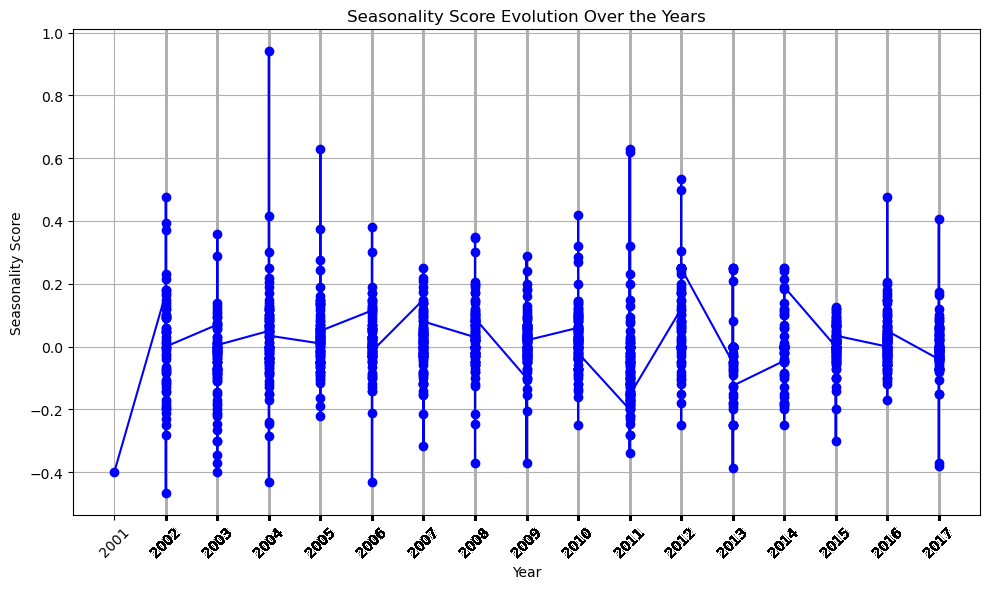

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(seasonality_scores['Year'], seasonality_scores['Seasonality_Score'], marker='o', color='b')
plt.title('Seasonality Score Evolution Over the Years')
plt.xlabel('Year')
plt.ylabel('Seasonality Score')
plt.grid(True)
plt.xticks(seasonality_scores['Year'], rotation=45)
plt.tight_layout()
plt.show()

/var/folders/ym/l2ghjvys50qctty39wm955gm0000gn/T/ipykernel_21723/630745749.py:27: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



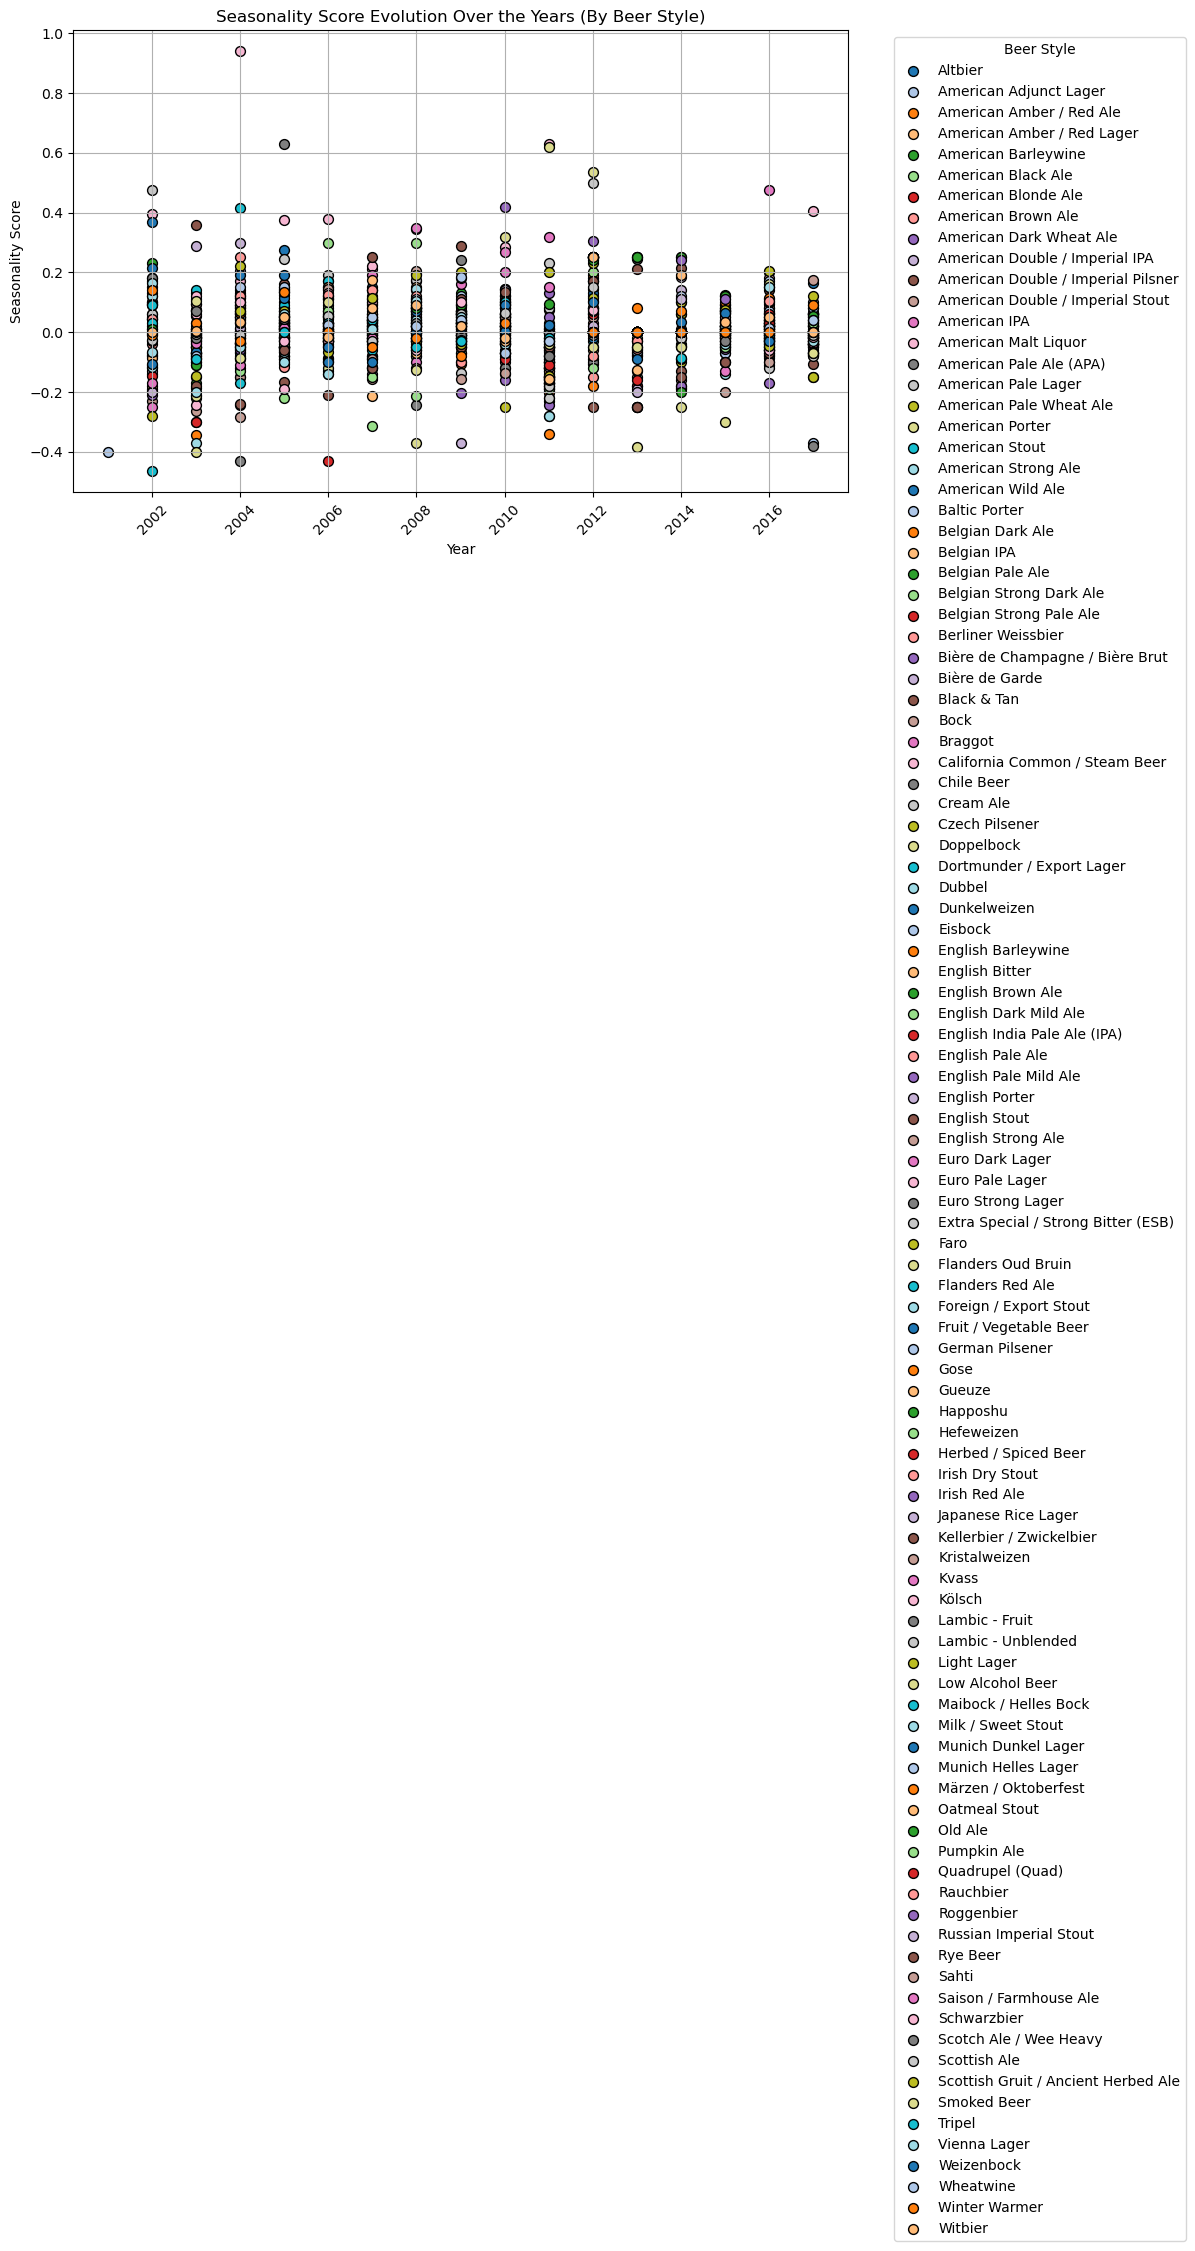

In [66]:
# Assuming 'seasonality_scores' is your DataFrame containing the beer styles and their seasonality scores

# Set up the color palette for different beer styles
plt.figure(figsize=(10, 6))

# Create a color palette to use for different styles
palette = sns.color_palette("tab20", n_colors=len(seasonality_scores['Style'].unique()))  # Color palette

# Plot the points (no lines) with different colors for each style
for idx, (style, group) in enumerate(seasonality_scores.groupby('Style')):
    plt.scatter(group['Year'], group['Seasonality_Score'], 
                color=palette[idx], label=style, s=50, edgecolor='black')

# Adding labels, title, and grid
plt.title('Seasonality Score Evolution Over the Years (By Beer Style)')
plt.xlabel('Year')
plt.ylabel('Seasonality Score')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Beer Style", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/ym/l2ghjvys50qctty39wm955gm0000gn/T/ipykernel_21723/2855873943.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


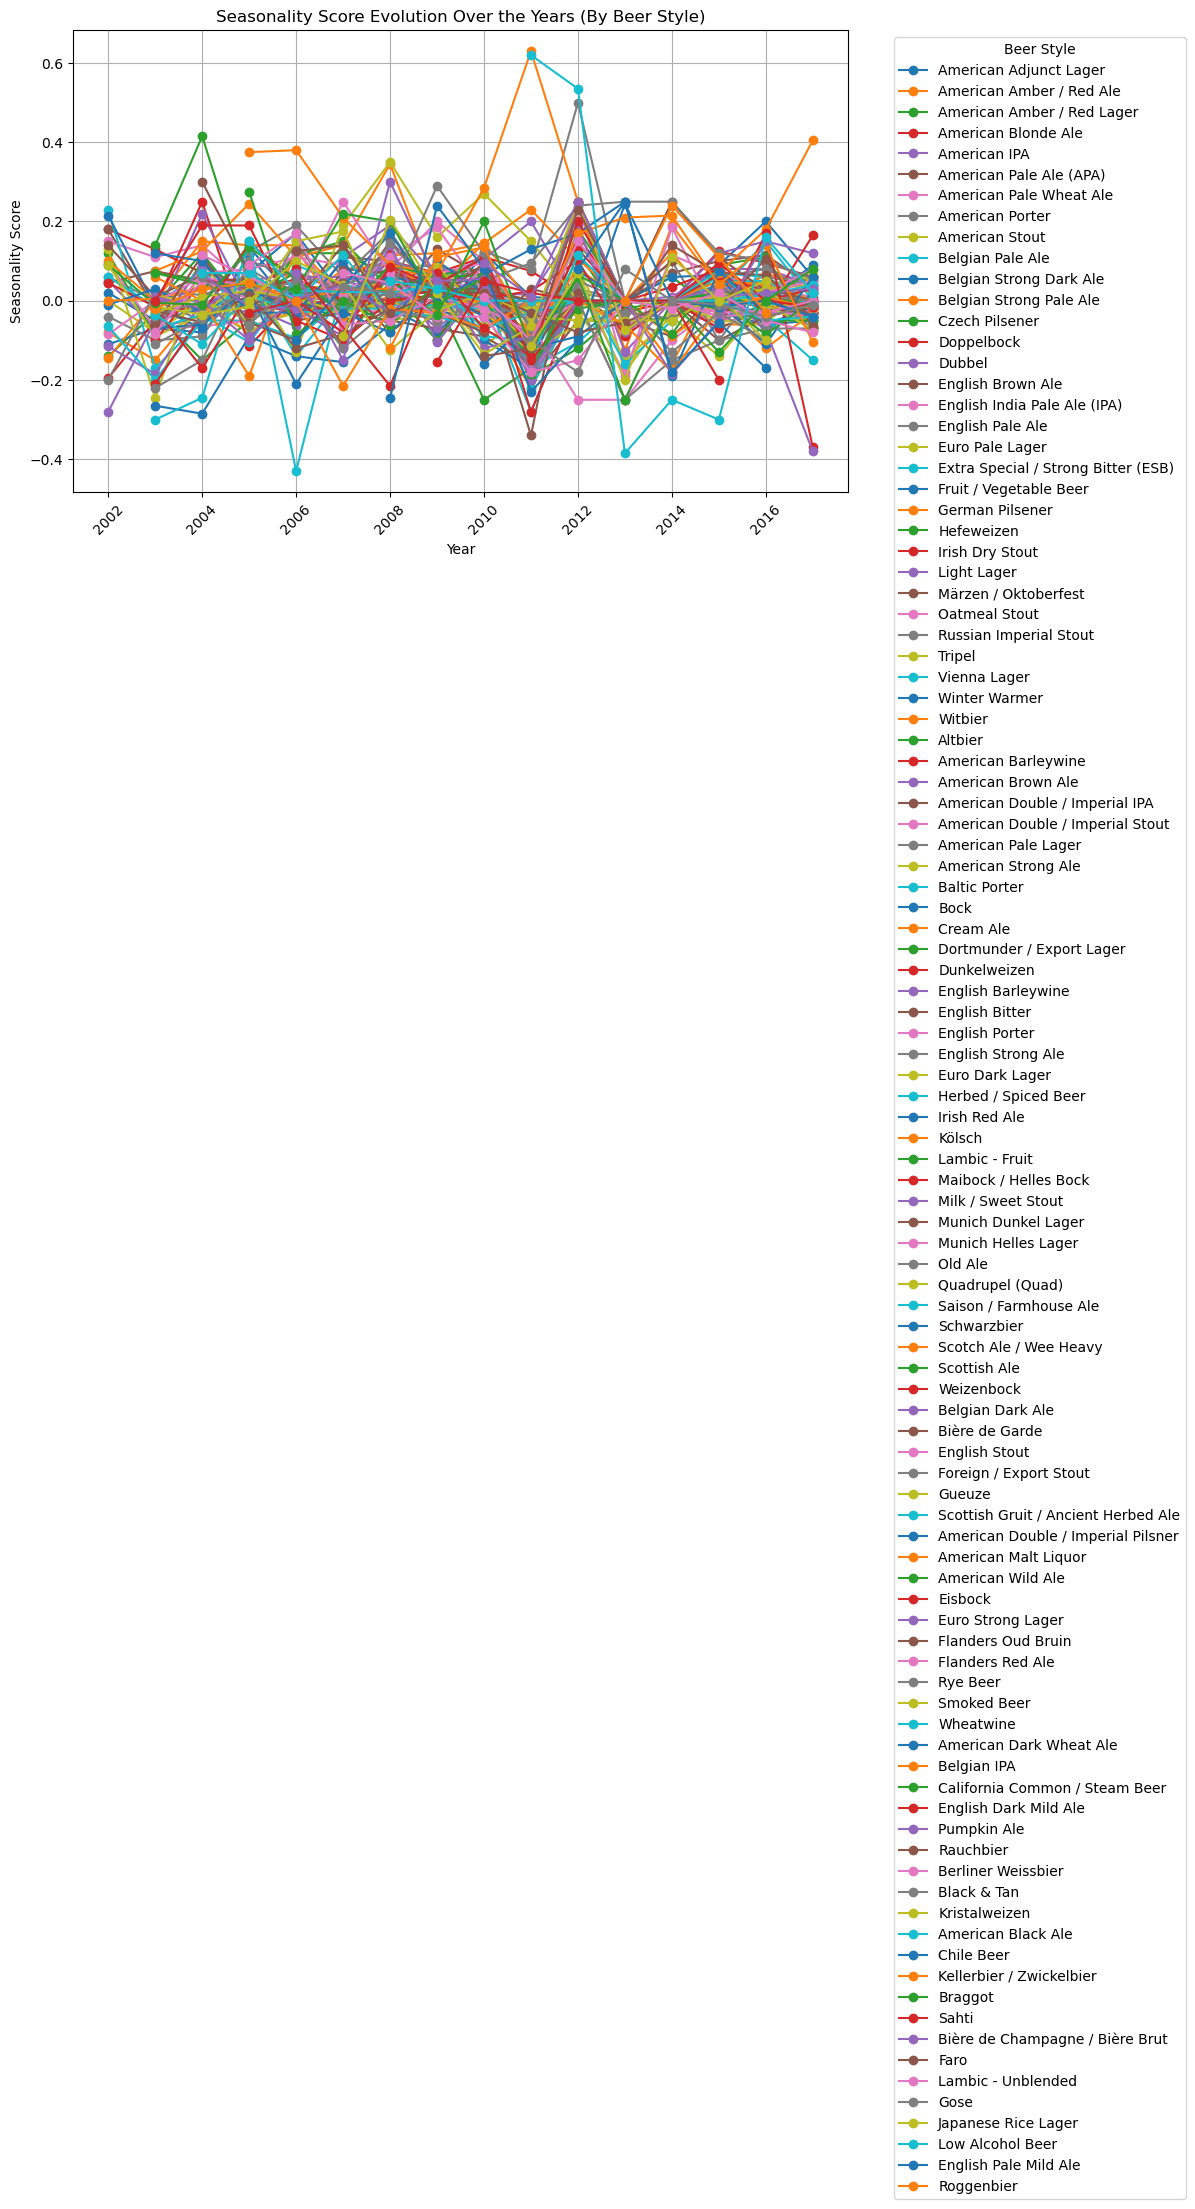

In [56]:
import matplotlib.pyplot as plt

def plot_seasonality_score(seasonality_scores_df):
    plt.figure(figsize=(10, 6))
    
    # Group the data by beer style and plot the evolution of seasonality score over years
    for style in seasonality_scores_df['Style'].unique():
        style_data = seasonality_scores_df[seasonality_scores_df['Style'] == style]
        plt.plot(style_data['Year'], style_data['Seasonality_Score'], marker='o', linestyle='-', label=style)

    plt.title('Seasonality Score Evolution Over the Years (By Beer Style)')
    plt.xlabel('Year')
    plt.ylabel('Seasonality Score')
    plt.legend(title="Beer Style", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming `seasonality_scores` is the output of your `calculate_seasonality_score` function
plot_seasonality_score(seasonality_scores)
